<a href="https://colab.research.google.com/github/balogz/Building-a-Simple-Chatbot-in-Python-using-NLTK/blob/master/Project_Insurance_Prediction_RAndomeforestregressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
car_insurance = pd.read_csv('/content/Car_Insurance_Claim.csv')

In [ ]:
# print first 5 rows in the dataframe
car_insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
# print last 5 rows of the dataframe
car_insurance.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [ ]:
# number of rows and columns
car_insurance.shape

(10000, 19)

In [ ]:
# getting some basic informations about the data
car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [ ]:
# checking the number of missing values
car_insurance.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


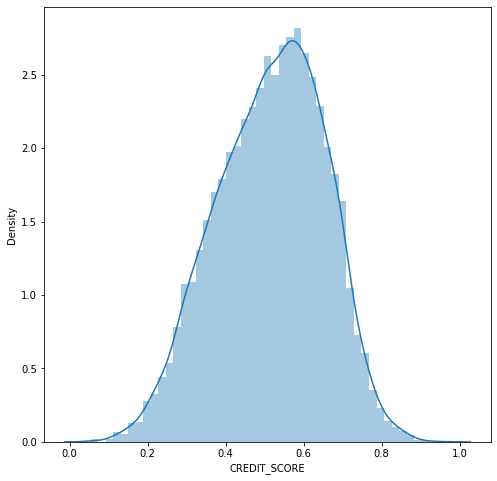

In [ ]:
plt.subplots(figsize=(8,8))
sns.distplot(car_insurance.CREDIT_SCORE)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


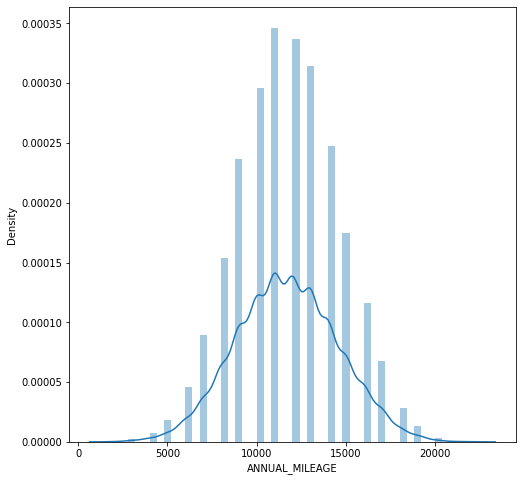

In [ ]:
plt.subplots(figsize=(8,8))
sns.distplot(car_insurance.ANNUAL_MILEAGE)

In [ ]:
car_insurance['CREDIT_SCORE'].fillna(car_insurance['CREDIT_SCORE'].median(),inplace=True)
car_insurance['ANNUAL_MILEAGE'].fillna(car_insurance['ANNUAL_MILEAGE'].median(),inplace=True)


In [ ]:
# getting the statistical measures of the data
car_insurance.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.516718,0.697000,0.498200,0.688800,19864.548400,11726.000000,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.130781,0.459578,0.500022,0.463008,18915.613855,2681.649329,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = car_insurance.corr()

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

NameError: ignored

In [ ]:
# correlation values of PAST_ACCIDENTS
print(correlation['PAST_ACCIDENTS'])

ID                     0.001831
CREDIT_SCORE           0.172008
VEHICLE_OWNERSHIP      0.119521
MARRIED                0.215269
CHILDREN               0.206295
POSTAL_CODE           -0.116985
ANNUAL_MILEAGE        -0.187678
SPEEDING_VIOLATIONS    0.443074
DUIS                   0.259359
PAST_ACCIDENTS         1.000000
OUTCOME               -0.311495
Name: PAST_ACCIDENTS, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


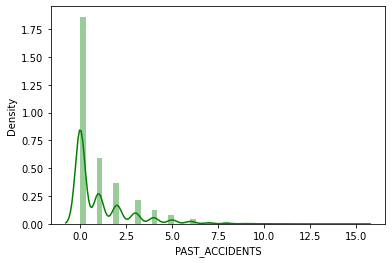

In [ ]:
# checking the distribution of the PAST_ACCIDENTS
sns.distplot(car_insurance['PAST_ACCIDENTS'],color='green')

In [ ]:
# encoding "GENDER" Column
car_insurance.replace({'GENDER':{'male':0,'female':1}},inplace=True)

# encoding "RACE" Column
car_insurance.replace({'RACE':{'majority':0,'minority':1}},inplace=True)

# encoding "EDUCATION" Column
car_insurance.replace({'EDUCATION':{'high school':0,'university':1,'none':2}},inplace=True)

# encoding "INCOME" Column
car_insurance.replace({'INCOME':{'upper class':0,'middle class':1,'poverty':2,'working class':3}},inplace=True)

# encoding "VEHICLE_YEAR" Column
car_insurance.replace({'VEHICLE_YEAR':{'after 2015':0,'before 2015':1}},inplace=True)

# encoding "VEHICLE_TYPE" Column
car_insurance.replace({'VEHICLE_TYPE':{'sedan':0,'sports car':1}},inplace=True)

# encoding "AGE" Column
car_insurance.replace({'AGE':{'16-25':0,'26-39':1,'40-64':2,'65+':3}},inplace=True)

# encoding "DRIVING_EXPERIENCE" Column
car_insurance.replace({'DRIVING_EXPERIENCE':{'0-9y':0,'10-19y':1,'20-29y':2,'30y+':3}},inplace=True)

Splitting the Features and Target

In [ ]:
X = car_insurance.drop(['ID'],axis=1)
Y = car_insurance['PAST_ACCIDENTS']

In [ ]:
print(X)

      AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0       3       1     0                   0          0       0      0.629027   
1       0       0     0                   0          2       2      0.357757   
2       0       1     0                   0          0       3      0.493146   
3       0       0     0                   0          1       3      0.206013   
4       1       0     0                   1          2       3      0.388366   
...   ...     ...   ...                 ...        ...     ...           ...   
9995    1       1     0                   1          1       0      0.582787   
9996    1       1     0                   1          2       1      0.522231   
9997    1       0     0                   0          0       1      0.470940   
9998    1       1     0                   1          0       2      0.364185   
9999    1       1     0                   0          2       3      0.435225   

      VEHICLE_OWNERSHIP  VEHICLE_YEAR  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: PAST_ACCIDENTS, Length: 10000, dtype: int64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[6. 0. 0. ... 2. 0. 0.]


In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9998689860420483


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

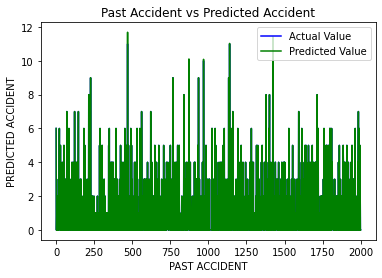

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Past Accident vs Predicted Accident')
plt.xlabel('PAST ACCIDENT')
plt.ylabel('PREDICTED ACCIDENT')
plt.legend()
plt.show()